In [ ]:
# TOPSIS FOR PRETRAINED MODEL

In [2]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import MinMaxScaler
import matplotlib.pyplot as plt
import seaborn as sns

# Load the data
df = pd.read_csv('data.csv')

In [4]:
# Normalize the data
scaler = MinMaxScaler()
df[['ROUGE Score', 'Summary Length', 'Inference Time (sec)']] = scaler.fit_transform(df[['ROUGE Score', 'Summary Length', 'Inference Time (sec)']])

# Apply TOPSIS (Step-by-step process)
weights = [0.4, 0.3, 0.3]  # Example weights for ROUGE, Length, and Inference Time
df[['Weighted ROUGE', 'Weighted Length', 'Weighted Time']] = df[['ROUGE Score', 'Summary Length', 'Inference Time (sec)']].multiply(weights)


In [5]:
# Ideal solutions
ideal_positive = df[['Weighted ROUGE', 'Weighted Length', 'Weighted Time']].max()
ideal_negative = df[['Weighted ROUGE', 'Weighted Length', 'Weighted Time']].min()

# Separation measures (Euclidean distance)
df['Positive Separation'] = np.sqrt(((df[['Weighted ROUGE', 'Weighted Length', 'Weighted Time']] - ideal_positive) ** 2).sum(axis=1))
df['Negative Separation'] = np.sqrt(((df[['Weighted ROUGE', 'Weighted Length', 'Weighted Time']] - ideal_negative) ** 2).sum(axis=1))


In [39]:
# Relative closeness to the ideal solution
df['Closeness'] = df['Negative Separation'] / (df['Positive Separation'] + df['Negative Separation'])

# Rank models based on closeness
df['Rank'] = df['Closeness'].rank(ascending=False)

# Output results to a CSV file
df_sorted = df.sort_values(by='Rank', ascending=True)
df_sorted.to_csv('TOPSIS_result.csv', index=False, float_format='%.4f')

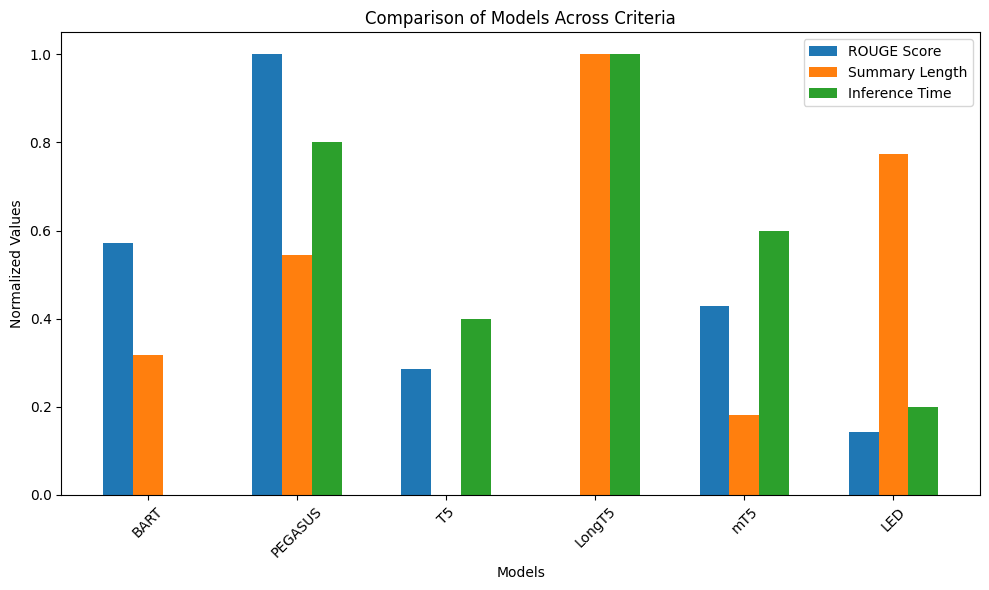

In [9]:
# Bar Plot for Each Criterion (ROUGE Score, Summary Length, Inference Time)
plt.figure(figsize=(10, 6))
bar_width = 0.2
index = np.arange(len(df))
plt.bar(index, df['ROUGE Score'], bar_width, label='ROUGE Score')
plt.bar(index + bar_width, df['Summary Length'], bar_width, label='Summary Length')
plt.bar(index + 2 * bar_width, df['Inference Time (sec)'], bar_width, label='Inference Time')
plt.xlabel('Models')
plt.ylabel('Normalized Values')
plt.title('Comparison of Models Across Criteria')
plt.xticks(index + bar_width, df['Model'], rotation=45)
plt.legend()
plt.tight_layout()
plt.savefig('comparison_criteria.png')
plt.show()

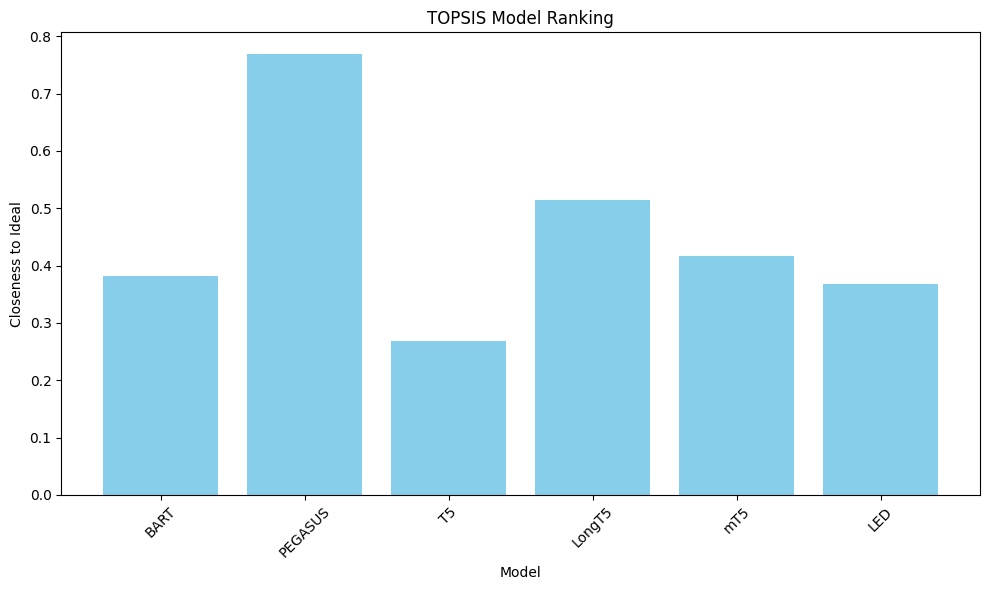

In [34]:
# Plot: Model Ranking by Closeness
plt.figure(figsize=(10, 6))
plt.bar(df['Model'], df['Closeness'], color='skyblue')
plt.xlabel('Model')
plt.ylabel('Closeness to Ideal')
plt.title('TOPSIS Model Ranking')
plt.xticks(rotation=45)
plt.tight_layout()
plt.savefig('model_ranking.png')
plt.show()

<ipython-input-30-f30e4c5405e9>:6: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot(data_to_plot, vert=True, patch_artist=True,


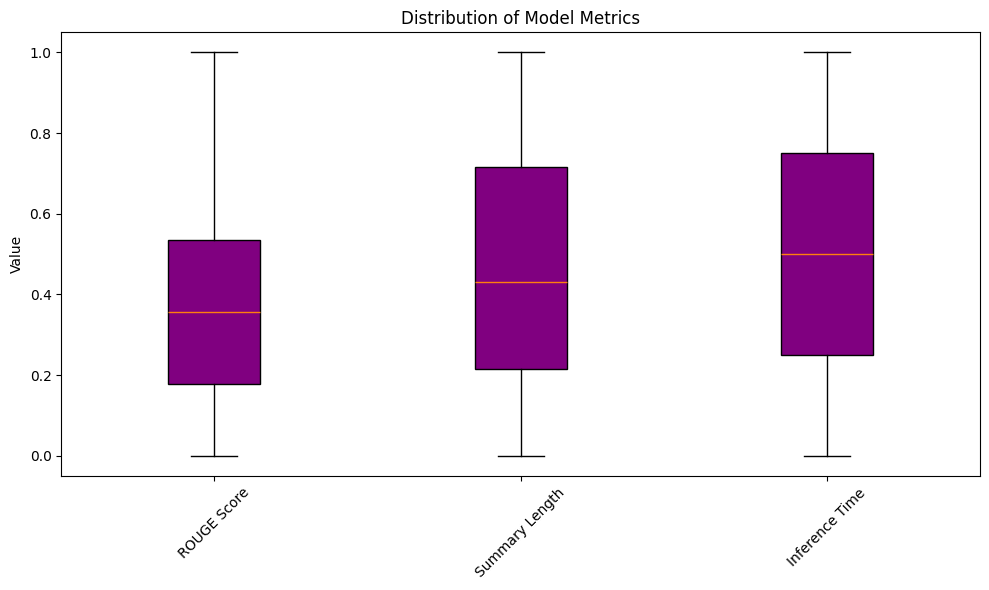

In [30]:
# Box Plot for Distribution of Each Metric (ROUGE Score, Summary Length, Inference Time)
plt.figure(figsize=(10, 6))

# Data for boxplot: ROUGE Score, Summary Length, and Inference Time
data_to_plot = [df['ROUGE Score'], df['Summary Length'], df['Inference Time (sec)']]
plt.boxplot(data_to_plot, vert=True, patch_artist=True,
            labels=['ROUGE Score', 'Summary Length', 'Inference Time'],
            boxprops=dict(facecolor='purple'))  # Change color here to 'magenta' or 'seagreen'

plt.title('Distribution of Model Metrics')
plt.ylabel('Value')
plt.xticks(rotation=45)
plt.tight_layout()
plt.savefig('model_metrics_boxplot.png')
plt.show()
